# Programming assignment 10: Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##  PCA Task

Given the data in the matrix X your tasks is to:
* Calculate the covariance matrix $\Sigma$.
* Calculate eigenvalues and eigenvectors of $\Sigma$.
* Plot the original data $X$ and the eigenvectors to a single diagram. What do you observe? Which eigenvector corresponds to the smallest eigenvalue?
* Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace.
* Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.	

### The given data X

In [2]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

### Task 1: Calculate the covariance matrix $\Sigma$

In [3]:
def get_covariance(X):
    """Calculates the covariance matrix of the input data.
    
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
        
    Returns
    -------
    Sigma : array, shape [D, D]
        Covariance matrix
        
    """
    xmean = np.sum(X, axis=0)/X.shape[0]
    return X.T.dot(X) - np.outer(xmean,xmean)

### Task 2: Calculate eigenvalues and eigenvectors of  $\Sigma$.

In [4]:
def get_eigen(S):
    """Calculates the eigenvalues and eigenvectors of the input matrix.
    
    Parameters
    ----------
    S : array, shape [D, D]
        Square symmetric positive definite matrix.
        
    Returns
    -------
    L : array, shape [D]
        Eigenvalues of S
    U : array, shape [D, D]
        Eigenvectors of S
    
    """
    L, U = np.linalg.eig(S)
    return L, U.T

### Task 3: Plot the original data X and the eigenvectors to a single diagram.

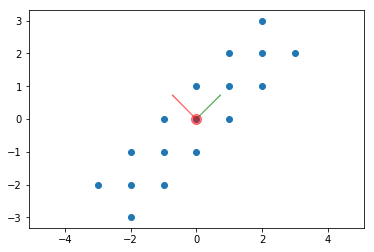

In [5]:
# plot the original data
plt.scatter(X[:, 0], X[:, 1])

# plot the mean of the data
mean_d1, mean_d2 = X.mean(0)
plt.plot(mean_d1, mean_d2, 'o', markersize=10, color='red', alpha=0.5)

# calculate the covariance matrix
Sigma = get_covariance(X)
# calculate the eigenvector and eigenvalues of Sigma
L, U = get_eigen(Sigma)

plt.axis('equal')
plt.arrow(mean_d1, mean_d2, U[0, 0], U[0, 1], width=0.01, color='green', alpha=0.5)
plt.arrow(mean_d1, mean_d2, U[1, 0], U[1, 1], width=0.01, color='red', alpha=0.5)

What do you observe in the above plot? Which eigenvector corresponds to the smallest eigenvalue?

Write your answer here:

$\left(-\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}\right)$

### Task 4: Transform the data

Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace. Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.

In [6]:
def transform(X, U, L):
    """Transforms the data in the new subspace spanned by the eigenvector corresponding to the largest eigenvalue.
    Parameters
    ----------
    X : array, shape [N, D]
        Data matrix.
    L : array, shape [D]
        Eigenvalues of Sigma_X
    U : array, shape [D, D]
        Eigenvectors of Sigma_X
        
    Returns
    -------
    X_t : array, shape [N, 1]
        Transformed data  
    """
    Xtilde = X - np.sum(X, axis=0)/X.shape[0]
    g = U[np.argmax(L), :]
    return Xtilde.dot(g)

In [7]:
X_t = transform(X, U, L)

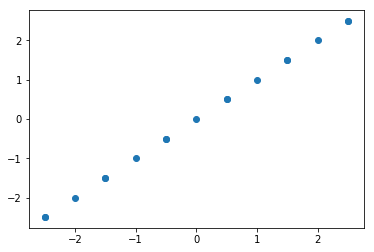

In [8]:
# Transform the reduced points back to the original space to validate the results
v = U[np.argmax(L), :]
Xnew = np.array([y * v for y in X_t])
plt.scatter(Xnew[:,0], Xnew[:,1])
plt.show()

##  Task SVD

### Task 5: Given the matrix $M$ find its SVD decomposition $M= U \cdot \Sigma \cdot V$ and reduce it to one dimension using the approach described in the lecture.

In [9]:
M = np.array([[1, 2], [6, 3],[0, 2]])

In [10]:
def reduce_to_one_dimension(M):
    """Reduces the input matrix to one dimension using its SVD decomposition.
    Parameters
    ----------
    M : array, shape [N, D]
        Input matrix.
        
    Returns
    -------
    M_t: array, shape [N, 1]
        Reduce matrix.
    """
    U,S,V = np.linalg.svd(M)
    return M.dot((V.T)[0,:])

In [11]:
M_t = reduce_to_one_dimension(M)
print(M_t)

[-1.90211303 -6.68109819 -1.05146222]
